In [6]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#### Geração dos dados ####

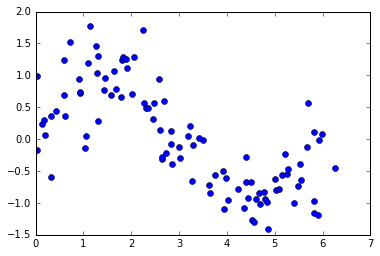

In [127]:
N = 100
x = np.sort(2*np.pi*np.random.random_sample((N,)))
e = 0.4 * np.random.randn(N)
y = np.sin(x)
y_e = y+e
plt.plot(x,y_e, 'o')
plt.show()

#### Fitando um polinômio utiizando o método dos mínimos quadrados ####

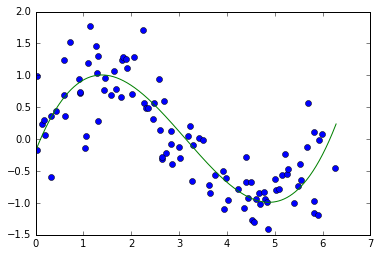

Erro de 0.43


In [128]:
xp = np.linspace(0, 2*np.pi, 1000)
z = np.polyfit(x, y, 3)
p = np.poly1d(z)
plt.plot(x,y_e, 'o')
plt.plot(xp,p(xp))
plt.show()
    
error_array = (p(x) - y_e)**2
error = np.sum(error_array)
    
print("Erro de %.2f" % np.sqrt(np.asarray(error)/N))

#### Calculando $\beta$ ####
$\beta$ é o inverso da variância do erro encontrado utilizando os parâmetros w calculados pelo método dos mínimos quadrados

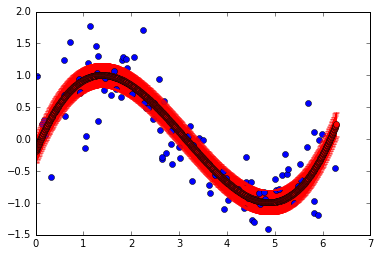

In [129]:
variance = error/N
beta = 1/variance

plt.plot(x,y_e, 'o')
plt.plot(xp,p(xp))
plt.errorbar(xp, p(xp), yerr=variance, fmt='o')
plt.show()